<h1 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: black;"><center><br>Project: Advertising A/B Testing</center> </h1>


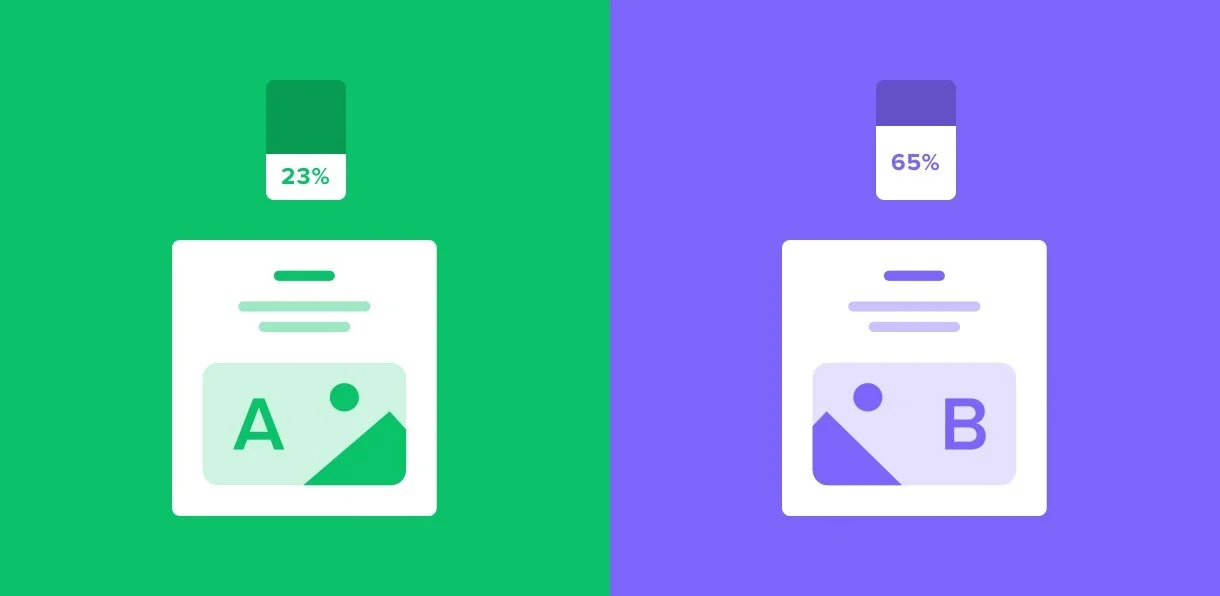

<p id="toc"></p>
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; letter-spacing: 3px; color: black;background-color:white; border-color:white  "><center><br>OVERVIEW</center></h1>

**Business objective**

The company is trying new ad design to increase ad success.<br> 
To do so they made new creative advertising design with SmartAd brand and performed an A/B test in which one group of users have been shown an old ad and another - new one.  


**Experiment Approach**

Our goal is to analyse the results of A/B test and figure out wherever new disign of ad affects the behavior of users in terms of responding to BIO questionnaire.

- **Null Hypothesis Hₒ: p = pₒ** - There is no significant difference between the ad success rate of both groups


- **Alternative Hypothesis Hₐ: p ≠ pₒ** - There is significant difference between the ad success rate of both groups.
Given we don’t know if the new design will perform better/worse/equal as our current design, we will perform a two-tailed test


- **Confidence Level:** 95% (α=0.05)


- **p** and **pₒ** stand for the conversion rate of the new and old design.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-description" data-toc-modified-id="Data-description-1"><br>Data description</a></span></li><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-2"><br>Import modules</a></span></li><li><span><a href="#Auxilary-functions" data-toc-modified-id="Auxilary-functions-3"><br>Auxilary functions</a></span></li><li><span><a href="#Configuration" data-toc-modified-id="Configuration-4"><br>Configuration</a></span></li><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-5"><br>Loading data</a></span><ul class="toc-item"><li><span><a href="#Load-input-csv-file" data-toc-modified-id="Load-input-csv-file-5.1">Load input csv file</a></span></li><li><span><a href="#Chech-head-lines" data-toc-modified-id="Chech-head-lines-5.2">Chech head lines</a></span></li><li><span><a href="#Check-overall-information" data-toc-modified-id="Check-overall-information-5.3">Check overall information</a></span></li><li><span><a href="#Check-dupliactes" data-toc-modified-id="Check-dupliactes-5.4">Check dupliactes</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5.5">Conclusion</a></span></li></ul></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-6"><br>Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Response" data-toc-modified-id="Response-6.1">Response</a></span></li><li><span><a href="#Experiment-group" data-toc-modified-id="Experiment-group-6.2">Experiment group</a></span></li><li><span><a href="#Date" data-toc-modified-id="Date-6.3">Date</a></span></li><li><span><a href="#Hour" data-toc-modified-id="Hour-6.4">Hour</a></span></li><li><span><a href="#Device" data-toc-modified-id="Device-6.5">Device</a></span></li><li><span><a href="#Browser" data-toc-modified-id="Browser-6.6">Browser</a></span></li><li><span><a href="#Platform" data-toc-modified-id="Platform-6.7">Platform</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6.8">Conclusion</a></span></li></ul></li><li><span><a href="#Statistical-Analysis" data-toc-modified-id="Statistical-Analysis-7"><br>Statistical Analysis</a></span><ul class="toc-item"><li><span><a href="#Formulating-Hypothesis" data-toc-modified-id="Formulating-Hypothesis-7.1">Formulating Hypothesis</a></span></li><li><span><a href="#Fisher-exact-test" data-toc-modified-id="Fisher-exact-test-7.2">Fisher exact test</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-7.2.1">Overview</a></span></li><li><span><a href="#Calculation" data-toc-modified-id="Calculation-7.2.2">Calculation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7.2.3">Conclusion</a></span></li></ul></li><li><span><a href="#Confidence-interval" data-toc-modified-id="Confidence-interval-7.3">Confidence interval</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-7.3.1">Overview</a></span></li><li><span><a href="#Calculation" data-toc-modified-id="Calculation-7.3.2">Calculation</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-7.3.3">Plot</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7.3.4">Conclusion</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><br>Conclusion</a></span></li></ul></div>

<h2><left><br>Data description</left></h2>


- Input data - csv file with following columns:


| Field  |Description  |
|--------|--------------|
| auction_id  | The unique id of the online user who has been presented the BIO. In standard terminologies this is called an impression id. The user may see the BIO questionnaire but choose not to respond. In that case both the yes and no columns are zero. |
| experiment | Which group the user belongs to - control or exposed |
| control | Users who have been shown a dummy ad |
| exposed | Users who have been shown a creative, an online interactive ad, with the SmartAd brand |
| date | The date in YYYY-MM-DD format |
| hour | The hour of the day in HH format |
| device_make | The name of the type of device the user has e.g. Samsung |
| platform_os | The id of the OS the user has |
| browser | The name of the browser the user uses to see the BIO questionnaire |
| yes | 1 if the user chooses the “Yes” radio button for the BIO questionnaire |
| no | 1 if the user chooses the “No” radio button for the BIO questionnaire |

<h2><left><br>Import modules</left></h2>

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from wordcloud import WordCloud
%matplotlib inline

<h2><left><br>Auxilary functions</left></h2>

In [2]:
def create_word_cloud(data, title):
    '''
    Create word cloud
    :params data: pandas dataframe
    :params title: title of output plot
    
    '''
    
    
    # Create the text variable
    text = " ".join(device_make.split(' ')[0] for device_make in data)

    # Create word_cloud using **.generate()** method
    word_cloud = WordCloud(collocations=False, 
                           background_color='#F3F3F3').generate(text)

    # Display Word Cloud
    plt.imshow(word_cloud, interpolation='none')
    plt.title(title+'\n')
    plt.axis("off")
    plt.show()

In [3]:
def get_browser(row):
    '''
    Map various browser name with general one
    :param row: browser column of pandas dataframe
    
    '''
    
    browsers = {'Chrome Mobile':'Chrome', 
                'Chrome Mobile WebView':'Chrome', 
                'Facebook':'Facebook',
                'Mobile Safari': 'Safari',
                'Chrome Mobile iOS':'Chrome', 
                'Samsung Internet':'Samsung',
                'Mobile Safari UI/WKWebView':'Safari', 
                'Chrome':'Chrome',
                'Opera Mini':'Opera',
                'Edge Mobile':'Edge',
                'Android':'Android',
                'Pinterest':'Pinterest',
                'Opera Mobile':'Opera',
                'Firefox Mobile':'Firefox',
                'Puffin':'Puffin'}
    
    return browsers[row]
    

In [4]:
def get_response(row):
    '''
    Create response column with ecnoded response values
    :param row: list of ['yes', 'no'] columns of pandas dataframe
    
    '''
    
    if row[0] == 1:
        res = 'yes'
    elif row[1] == 1:
        res = 'no'
    else:
        res = 'no response'
        
    return res

In [5]:
def get_category_percent(row, decimal=1):
    '''
    Get percent of value distributed amoung colums
    :param row: list of columns from pandas dataframe
    '''
    
    return round(row/max(row)*100, decimal)

In [6]:
def statplot(data, lim, obs_stat, title):
    """
    This function creates a plot, that represents sampling distribution. 
    This plot is formatted and has main statistics on it
    :param data: array
    :param lim: height of the plot
    :param obs_stat: observed statistic
    :param title: chart title
    """
    
    #Create a kdeplot
    plt.figure(figsize=(12,4), tight_layout=True)
    ax = sns.kdeplot(data, linewidth = 0.8, color = 'black')
    
    # Simple formatting
    frame = ['right', 'left', 'top']
    for i in frame:
        ax.spines[i].set_visible(False)

    plt.title(title)
    plt.ylabel('')
    plt.yticks([], [])
    
    # Legend
    line = Line2D([0], [0], color='red', linestyle = '-', label='zero value')
    line_dashed = Line2D([0], [0], color='black', linestyle = '--', label='mean and standard deviation')
    plt.legend(handles=[line, line_dashed], loc='upper left');
    
    # Create a list of 3 standard deviation to the left and to the right and mean
    std_list = []
    std_list_format = []
    for i in range(-3,4):
        std_dev = np.std(data) * i + np.mean(data)
        std_list.append(std_dev)
        std_list_format.append('{0:.3f}'.format(std_dev) + '\n {} std'.format(i))
        
    # Create a list of corresponding y values
    data_x, data_y = ax.lines[0].get_data()
    height = []
    for i in std_list:
        height.append(np.interp(i, data_x, data_y))
        
    # Plotting vertical lines representing std deviations 
    for a, b in zip(std_list, height):
        plt.axvline(a, 0, b/lim, color = 'black', alpha = 1, linewidth = 0.8, linestyle = '--')
        plt.plot(a, b, marker = 'o', color = 'blue')
    
    # Plotting observed statistic
    obs_line_height = np.interp(obs_stat, data_x, data_y)
    plt.axvline(obs_stat, 0, obs_line_height/lim, color = 'red', alpha = 1, linewidth = 1.5, linestyle = '-')
    plt.plot(obs_stat, obs_line_height, marker = 'o', color = 'red')
            
    # Plotting x ticks
    x_ticks = std_list
    x_labels = std_list_format
    plt.xticks(x_ticks, x_labels)
    plt.ylim(0,lim)

In [7]:
def shading(data, left, right, color):
    
    """
    This function shades areas of the kde plot.
    :param data: array
    :param left: left boundary of the area to be shaded
    :param right: right boundary of the area to be shaded
    :param color: color
    """
    
    #Shading areas
    kde = stats.gaussian_kde(data)
    shade = np.linspace(left, right, 100)
    plt.fill_between(shade, kde(shade), color = color, alpha = 0.2);

<h2><left><br>Configuration</left></h2>

In [8]:
input_file = '../data/AdSmartABdata.csv'

In [9]:
# Set up the format and styles for plots globally
sns.set_style('white')
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=11)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.rc('font', size=10)

<h2><left><br>Loading data</left></h2>

### Load input csv file

In [10]:
df = pd.read_csv(input_file)

### Chech head lines

In [11]:
df.head(10)

auction_id experiment        date  hour  \
0  0008ef63-77a7-448b-bd1e-075f42c55e39    exposed  2020-07-10     8   
1  000eabc5-17ce-4137-8efe-44734d914446    exposed  2020-07-07    10   
2  0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed  2020-07-05     2   
3  00187412-2932-4542-a8ef-3633901c98d9    control  2020-07-03    15   
4  001a7785-d3fe-4e11-a344-c8735acacc2c    control  2020-07-03    15   
5  0027ce48-d3c6-4935-bb12-dfb5d5627857    control  2020-07-03    15   
6  002e308b-1a07-49d6-8560-0fbcdcd71e4b    control  2020-07-03    15   
7  00393fb9-ca32-40c0-bfcb-1bd83f319820    control  2020-07-09     5   
8  004940f5-c642-417a-8fd2-c8e5d989f358    exposed  2020-07-04     0   
9  004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342    control  2020-07-05    14   

          device_make  platform_os                browser  yes  no  
0  Generic Smartphone            6          Chrome Mobile    0   0  
1  Generic Smartphone            6          Chrome Mobile    0   0  
2               E5823            6  Chrome Mobile WebView    0   1  
3   Samsung SM-A705FN            6               Facebook    0   0  
4  Generic Smartphone            6          Chrome Mobile    0   0  
5    Samsung SM-G960F            6               Facebook    0   0  
6  Generic Smartphone            6          Chrome Mobile    0   0  
7    Samsung SM-G973F            6               Facebook    0   0  
8  Generic Smartphone            6  Chrome Mobile WebView    0   0  
9  Generic Smartphone            6          Chrome Mobile    0   0

### Check overall information

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


### Check dupliactes

In [13]:
num_duplicates = sum(df.duplicated(subset=['auction_id']))

print(f'Amount of duplicates: {num_duplicates}')

Amount of duplicates: 0


### Conclusion

Input file read successfully:

- Rows: 8077

- Columns: 8

- Null values: 0

- Duplicates: 0

<h2><left><br>Data Analysis</left></h2>

### Response

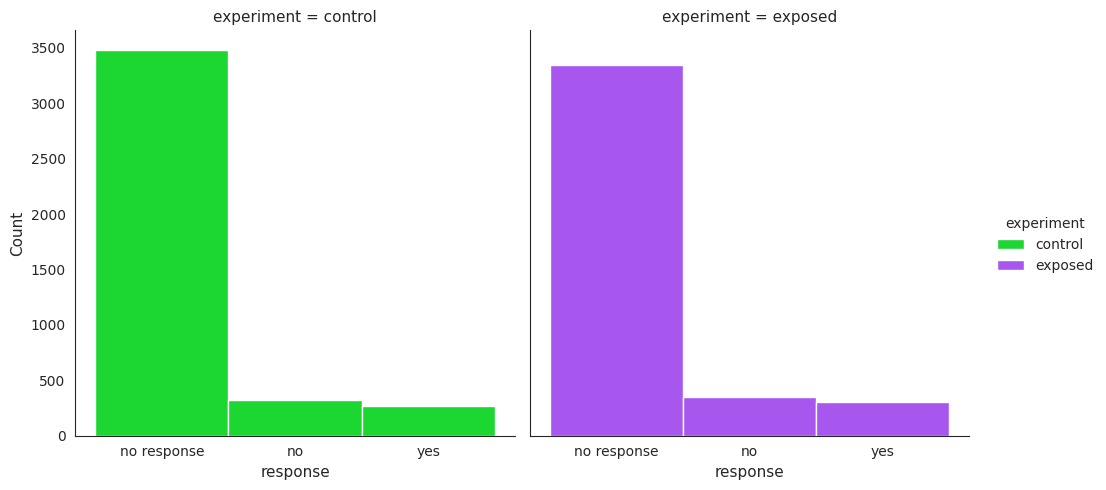

response %  yes   no  no response
experiment                       
control     6.5  7.9         85.6
exposed     7.7  8.7         83.6

In [14]:
df['response'] = df[['yes', 'no']].apply(get_response, axis=1)

sns.displot(df.sort_values(by='experiment'), x='response', 
            col='experiment', hue='experiment', 
            palette=['#1CD631','#A757EE'], alpha=1)

plt.show()

df_response = pd.pivot_table(data=df, index='experiment', columns='response', aggfunc='count')['auction_id']

df_response['total'] = df_response.apply(sum, axis=1)

df_response = df_response.apply(get_category_percent, axis=1)

df_response.columns.name = 'response %'

df_response = df_response[['yes', 'no', 'no response']]

display(df_response)

- As we can see, typically (~83-85%) user dont respond to a questionaire


- Similar amount of users (6.5 - 8.7 %) respond as 'yes' or 'no'


- We dont need data with 'No response' as it will not be popssible usefull in further analysis of A/B test


- Let's now work only with users, who participated in test - meaning they respond 'Yes' or 'No'

In [15]:
df = df[(df['yes'] == 1) | (df['no'] == 1)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 2 to 8071
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   1243 non-null   object
 1   experiment   1243 non-null   object
 2   date         1243 non-null   object
 3   hour         1243 non-null   int64 
 4   device_make  1243 non-null   object
 5   platform_os  1243 non-null   int64 
 6   browser      1243 non-null   object
 7   yes          1243 non-null   int64 
 8   no           1243 non-null   int64 
 9   response     1243 non-null   object
dtypes: int64(4), object(6)
memory usage: 106.8+ KB


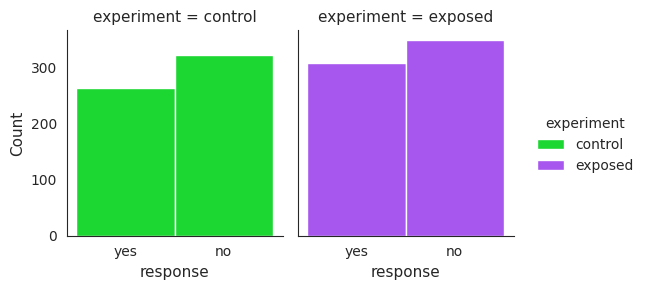

response %   yes    no
experiment            
control     45.1  54.9
exposed     46.9  53.1

In [16]:
sns.displot(df.sort_values(by='experiment'), x='response', 
            col='experiment', hue='experiment', 
            palette=['#1CD631','#A757EE'], alpha=1, height=3, aspect=0.9)

plt.show()

df_response = pd.pivot_table(data=df, index='experiment', columns='response', aggfunc='count')['auction_id']

df_response['total'] = df_response.apply(sum, axis=1)

df_response = df_response.apply(get_category_percent, axis=1)

df_response.columns.name = 'response %'

df_response = df_response[['yes', 'no']]

display(df_response)

- Both groups have similar conversion rate ~ 45-47%

### Experiment group

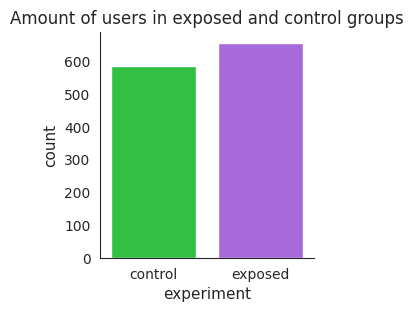

Percent of users in control group: 47.1%
Percent of users in exposed group: 52.9%


In [17]:
sns.catplot(data=df.sort_values(by='experiment'), x='experiment', 
            kind='count', height=3, palette=['#1CD631','#A757EE'])\
            .set(title='Amount of users in exposed and control groups')
plt.show()

print('Percent of users in control group: {:.1%}'\
      .format(len(df[df['experiment']=='control'])/len(df)))
print('Percent of users in exposed group: {:.1%}'\
      .format(len(df[df['experiment']=='exposed'])/len(df)))

- Sizes of user groups are similar

### Date

In [18]:
print('First date of experiment: {}'.format(df['date'].min()))
print('Last date of experiment:  {}'.format(df['date'].max()))

First date of experiment: 2020-07-03
Last date of experiment:  2020-07-10


- Experiment was held for a week

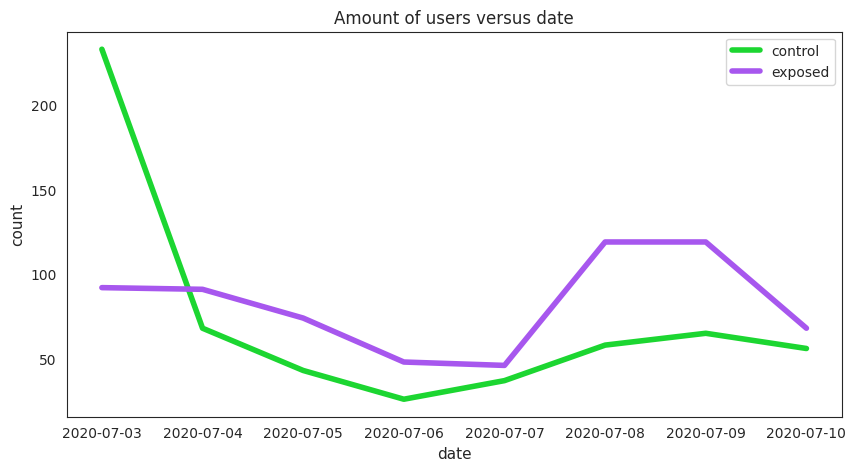

In [19]:
fig, ax = plt.subplots(figsize=(10,5))

g = sns.lineplot(df.groupby(['experiment', 'date'])['date'].count()['control'], 
                ax=ax, label='control', color='#1CD631', linewidth = 4)
g = sns.lineplot(df.groupby(['experiment', 'date'])['date'].count()['exposed'], 
                ax=ax, label='exposed', color='#A757EE', linewidth = 4)

ax.set_ylabel('count')
ax.set_title('Amount of users versus date')
plt.show()

- On first day of experiment number of users in the control group was much higher than in the exposed group. On other days amount of users were slightly higher in exposed group.

### Hour

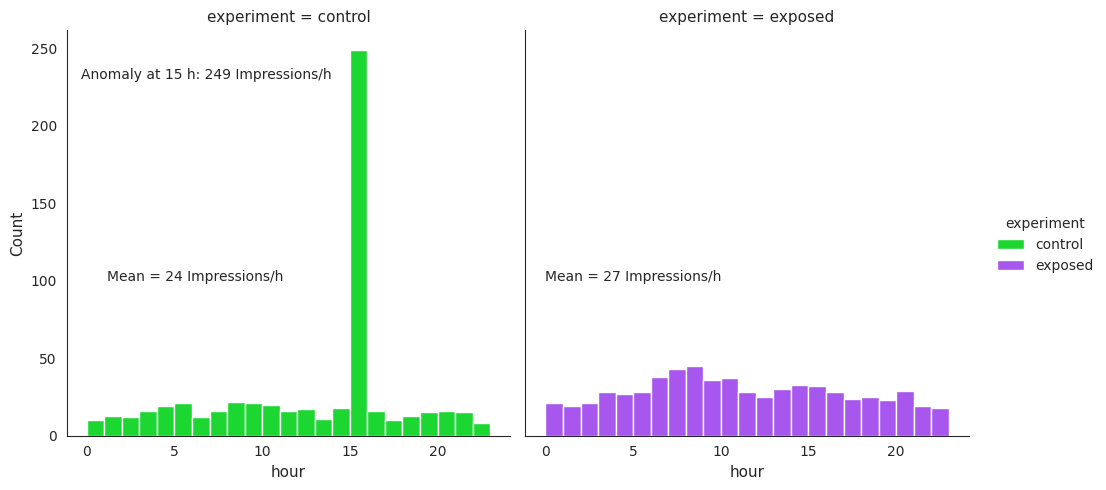

In [20]:
sns.displot(df.sort_values(by='experiment'), x='hour', col='experiment', 
            bins=range(24), hue='experiment', 
            palette=['#1CD631','#A757EE'], alpha=1)


plt.text(-25, 100, "Mean = {:.0f} Impressions/h"\
         .format(df[df['experiment']=='control']\
                 .groupby('hour')['experiment'].count().mean()))

plt.text(-26.5, 230, "Anomaly at 15 h: {:.0f} Impressions/h"\
         .format(df[df['experiment']=='control']\
                 .groupby('hour')['experiment'].count().max()))

plt.text(0, 100, "Mean = {:.0f} Impressions/h"\
         .format(df[df['experiment']=='exposed']\
                 .groupby('hour')['experiment'].count().mean()))


plt.show()

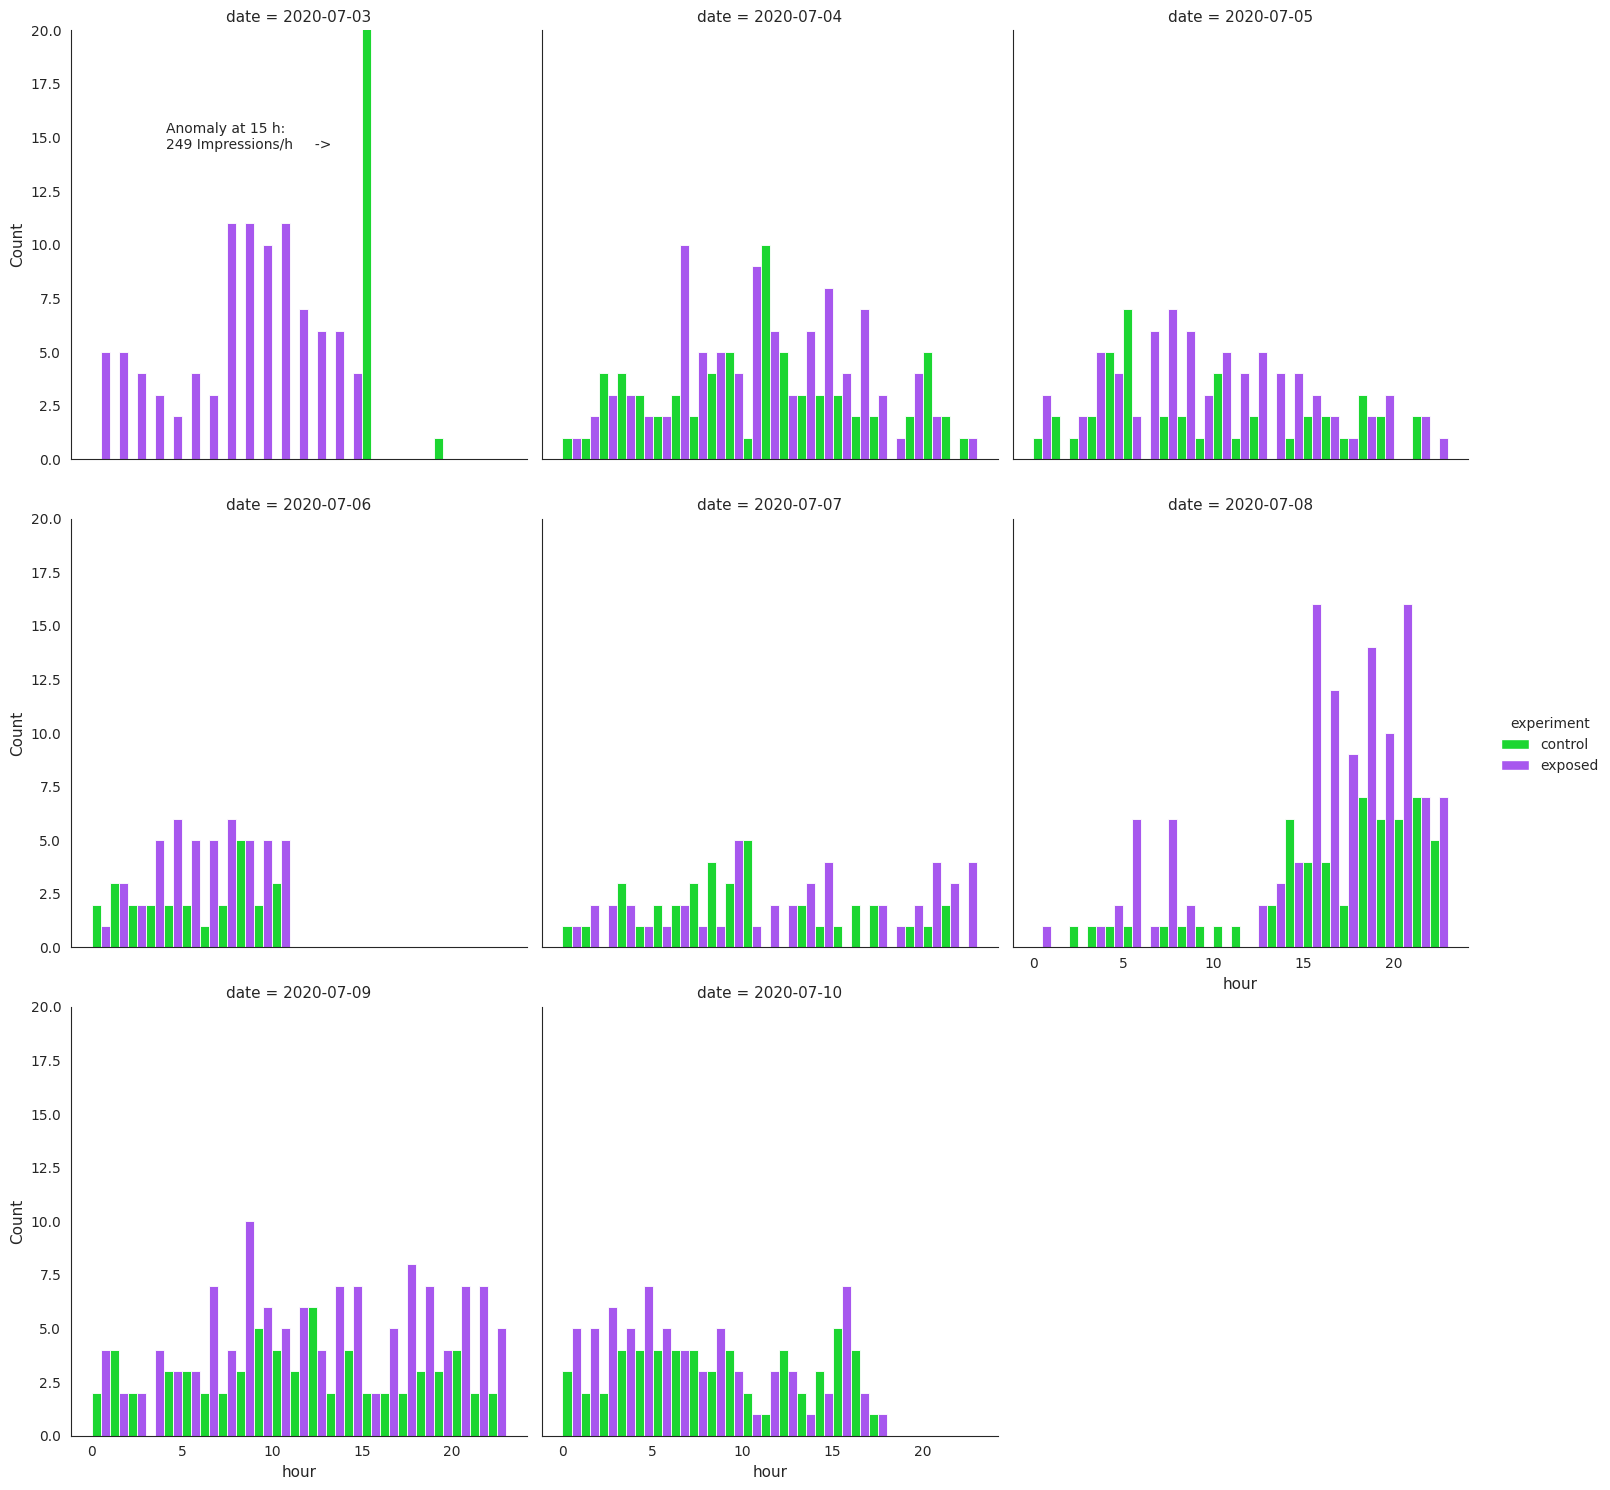

In [21]:
sns.displot(df.sort_values(by=['date','experiment']), x='hour', col='date', bins=range(24), 
            hue='experiment', palette=['#1CD631','#A757EE'], alpha=1,
            multiple="dodge", col_wrap=3, facet_kws=dict(sharey=True))
plt.ylim([0, 20])

plt.text(-22, 60, "Anomaly at 15 h:\n{:.0f} Impressions/h     ->"\
         .format(df[df['experiment']=='control']\
                 .groupby('hour')['experiment'].count().max()))
plt.show()

- We have some variations in hours between two groups during different days, but on the first day of experiment we got an extreme values of users in control group during 15 hour. 

### Device

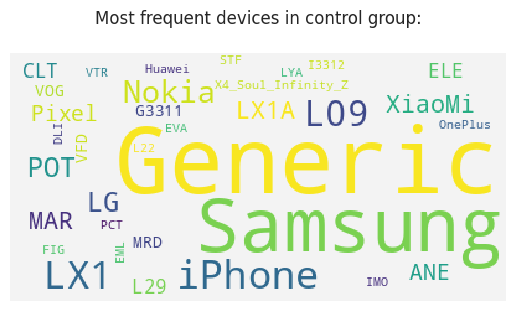

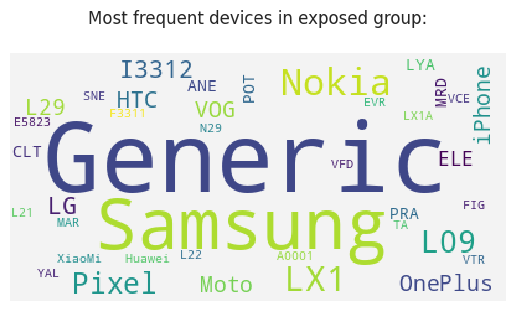

In [22]:
create_word_cloud(df[df['experiment']=='control'].device_make, 
                  'Most frequent devices in control group:')

create_word_cloud(df[df['experiment']=='exposed'].device_make, 
                  'Most frequent devices in exposed group:')

- Here we can see most frequent used devices in both testing groups


- Among most popular devices in control and exposed groups are:
    
    - Generic Smartphone
    - Samsung
    - iPhone
    

### Browser

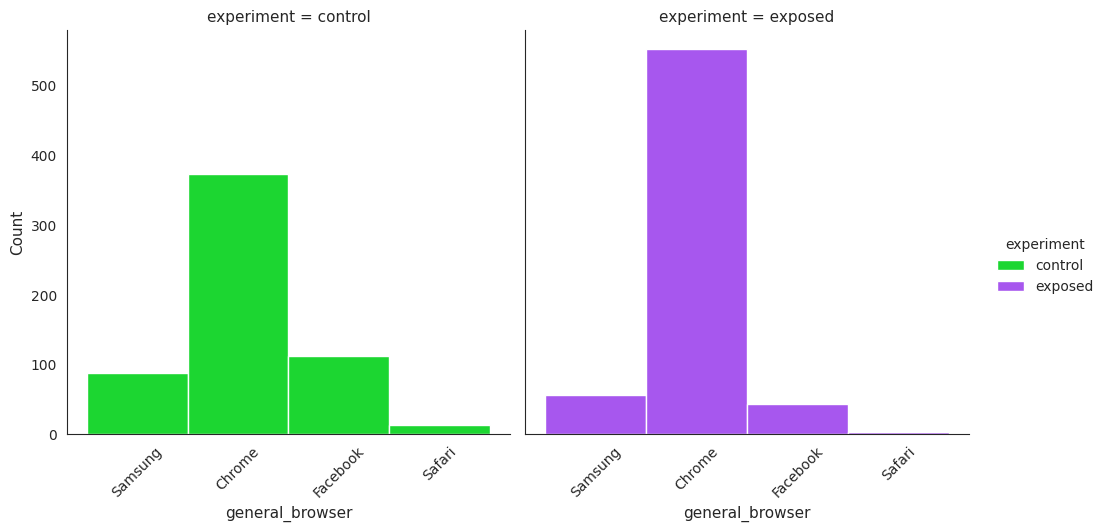

browser usage %  Samsung  Chrome  Facebook  Safari
experiment                                        
control             15.0    63.7      19.1     2.2
exposed              8.7    84.0       6.7     0.6

In [23]:
# Create column 'general_browser'
df['general_browser'] = df['browser'].apply(get_browser)

# Plot
g = sns.displot(df.sort_values(by='experiment'), x='general_browser', 
                col='experiment', hue='experiment', 
                palette=['#1CD631','#A757EE'], alpha=1)

g.set_xticklabels(rotation=45)
plt.show()

# Calculate percentage
df_browser = pd.pivot_table(data=df, index='experiment', columns='general_browser', aggfunc='count')['auction_id']

df_browser['total'] = df_browser.apply(sum, axis=1)

df_browser = df_browser.apply(get_category_percent, axis=1)

df_browser.columns.name = 'browser usage %'

df_browser.drop(columns='total', inplace=True)

df_browser = df_browser[['Samsung', 'Chrome', 'Facebook', 'Safari']]

display(df_browser)

- Most users in both groups use Chrome browser:


    - 63.7 % for control group
    - 84.0 % for exposed group

### Platform

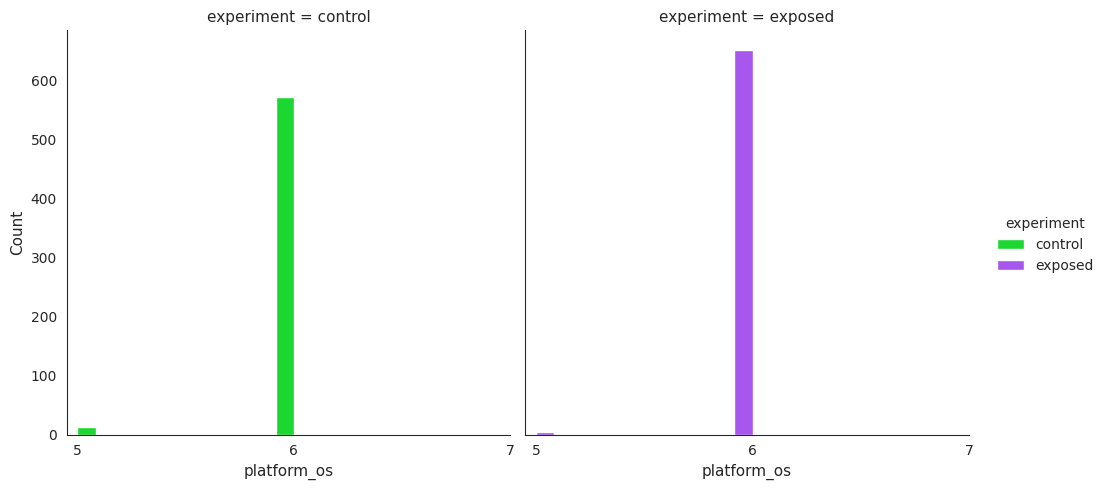

In [24]:
sns.displot(df.sort_values(by='experiment'), x='platform_os', 
            col='experiment', hue='experiment', 
            palette=['#1CD631','#A757EE'], alpha=1)\
                                                .set(xticks=list(range(5,8)))

plt.show()

- Majority of platforms in both groups are represented by platform_os - 6

### Conclusion

- 83-85% of users didnt respond to a questionaire


- Both groups have conversion rate at around ~ 45-47%


- Sizes of control and exposed groups are similar


- Experiment was held for a week


- There were anomal amount of users (249) in control group at 07-03-2020 at 15 hour, although mean value equals 24.  


- Among most popular devices in control and exposed groups are:

    - Generic Smartphone
    - Samsung
    - iPhone


- Most users in both groups use Chrome browser - 63.7 % for control group, 84.0 % for exposed group


- Majority of platforms in both groups are represented by platform_os - 6

<h2><left><br>Statistical Analysis</left></h2>

- In order to understand whereever new ad change the coversion rate we should estimate if the difference between results wiht old ad and new one is significant.

### Formulating Hypothesis 


- **Null Hypothesis Hₒ: p = pₒ** - There is no significant difference between the ad success rate of both groups


- **Alternative Hypothesis Hₐ: p ≠ pₒ** - There is significant difference between the ad success rate of both groups.
Given we don’t know if the new design will perform better/worse/equal as our current design, we will perform a two-tailed test


- **Confidence Level:** 95% (α=0.05)


- **p** and **pₒ** stand for the conversion rate of the new and old design.

### Fisher exact test

#### Overview

- Fisher exact test can be used to show how variable differs between groups


- There are several assumptions for Fisher test:

    1. Random sample - in each group data point should be from random sample.

    2. Independence - each observation should be independent
    
    3. Mutually exclusive groups - each category should be mutlually exclusive
    
    
- All of these assupmtions are valid for our case:

    1. All users from ech group are random without any particular bias
    2. Each user made independent decision
    3. Response is mutual - its either 'yes' or 'no'

#### Calculation

In [25]:
contingency = pd.pivot_table(data=df, index='experiment', columns='response', aggfunc='count')['auction_id']

contingency

response     no  yes
experiment          
control     322  264
exposed     349  308

In [26]:
odds_ratio, p_value = stats.fisher_exact(contingency, alternative="two-sided")

print('Fisher test p-value: {:.2f}'.format(p_value))

Fisher test p-value: 0.53


#### Conclusion

- Fisher test P-value equals 0.53, therefore we cannot reject Hₒ hypothesis


- Result: there is no significant difference between conversion rate in control and exposed group

### Confidence interval

#### Overview

- We can conduct A/B test using confidence intervals. 
<br>
- The margin of error is calculated from the estimated standard deviation of the parameter, multiplied by a Z-score corresponding to the chosen confidence level. 
<br>
- The bounds of a confidence interval for the absolute difference between two means are calculated with the following equation:
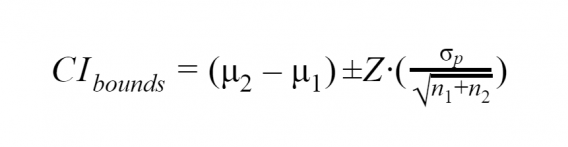
where

    - μ1 is the mean of the baseline or control group.
    - μ2 is the mean of the treatment group.
    - n1 is the sample size of the baseline or control group.
    - n2 is the sample size of the treatment group.
    - σp is the pooled standard deviation of the two groups.
    - Z is the score statistic corresponding to the desired confidence level.
    
    
- The interval bounds depend on:

    1. The random error introduced by the observed difference in the means;
    2. The error in estimating the standard deviation of said difference.

#### Calculation

- Calculate z score for confidence interval 95%

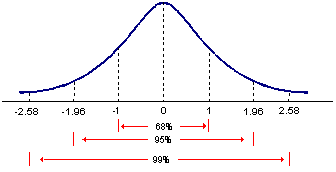

- Basically zscore for specific interval defines how far we should deviate from mean value of normal distribution in both directions to cover 95% of data values around mean

In [27]:
zscore = norm.ppf(1 - .05/2)

print('Zscore = {:.2f}'.format(zscore))

Zscore = 1.96


- Calculate mean values for both groups

In [28]:
e_mean = df.query('experiment=="exposed"')['yes'].mean()
c_mean = df.query('experiment=="control"')['yes'].mean()

- Now we should calculate pooled variance from two groups

In [29]:
e_std = df.query('experiment=="exposed"')['yes'].std()
c_std = df.query('experiment=="control"')['yes'].std()

e_num = df.query('experiment=="exposed"')['yes'].shape[0]
c_num = df.query('experiment=="exposed"')['yes'].shape[0]

In [30]:
var_pooled = (((e_num-1)*e_std**2 + (c_num-1)*c_std**2)/(e_num+c_num-2))**0.5

- Calculate high and low borders of confident intervals

In [31]:
CI_low = (e_mean - c_mean) - zscore * var_pooled * (1/e_num + 1/c_num)**.5
CI_high = (e_mean - c_mean) + zscore * var_pooled * (1/e_num + 1/c_num)**.5

#### Plot

- Generate binominal distribution based on calculated group means 

In [32]:
e_binom = np.random.binomial(e_num, e_mean, 100000)/e_num

c_binom = np.random.binomial(c_num, c_mean, 100000)/c_num

diff_binom = e_binom - c_binom

- Generate normal distribution

In [33]:
norm_dist = np.random.normal(0, np.std(diff_binom), len(diff_binom))

- Plot

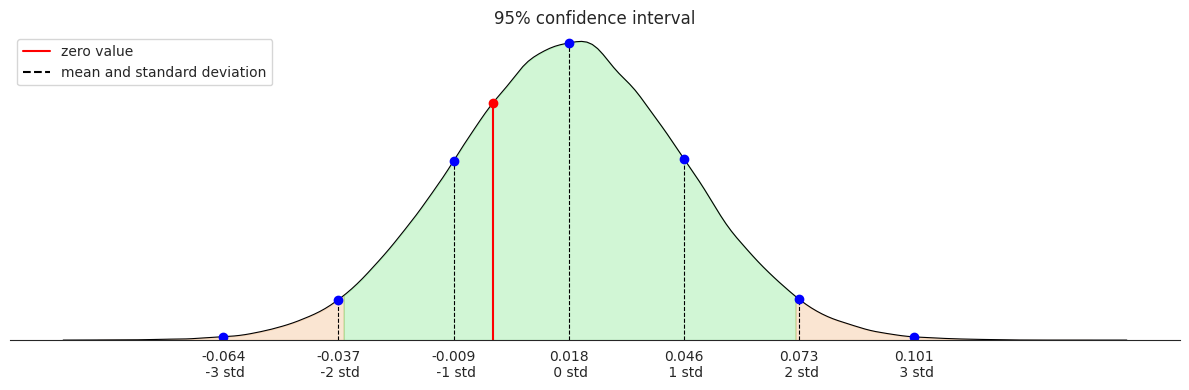

95% confidence interval: [-0.04, 0.07]


In [34]:
statplot(diff_binom, 15, np.mean(norm_dist), '95% confidence interval')
shading(diff_binom, diff_binom.min(), CI_low, '#E67E22')
shading(diff_binom, CI_low, CI_high, '#1CD631')
shading(diff_binom, CI_high, diff_binom.max(), '#E67E22')
plt.show()

print('95% confidence interval: [{:.2f}, {:.2f}]'.format(CI_low, CI_high))

#### Conclusion

- Confidence interval tells us that with 95% difference between two mean can be found between [-0.04, 0.07] which means we cannot reject Null hypothesis. 


- We can conclude that there is no significant difference between conversion rates with old and new ad

<h2><left><br>Conclusion</left></h2>

- Based on the results of conducted A/B test with Fisher exact test and confidence interval we can conclude that new ad design havent changed the conversion rate.